In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Set the size of the lattice and the number of time steps
L = 100
num_steps = 100

# Initialize the lattice with all zeros
lattice = np.zeros((L, L))

# Initialize the agent's starting position in the center of the lattice
x, y = L//2, L//2

# Define a function to take a snapshot of the lattice and save it to a PNG file
def save_snapshot(lattice, step):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(lattice, cmap='gray')
    plt.axis('off')
    plt.title('Step {}'.format(step))
    plt.savefig('step_{}.png'.format(step))
    plt.close(fig)

# Simulate the random walk
for step in range(num_steps):
    # Randomly choose one of the agent's four neighbors
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    # Move the agent to the chosen neighbor's position, wrapping around the edges of the lattice
    x = (x + dx) % L
    y = (y + dy) % L
    # Increment the value of the lattice at the agent's new position
    lattice[x, y] += 1
    # Take a snapshot of the lattice and save it to a PNG file
    save_snapshot(lattice, step)

# Convert the PNG files into an animated GIF using imageio
with imageio.get_writer('random_walk.gif', mode='I', fps=10) as writer:
    for step in range(num_steps):
        image = imageio.imread('step_{}.png'.format(step))
        writer.append_data(image)


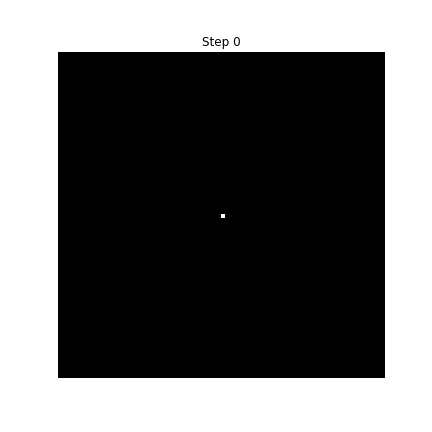

In [4]:
from IPython.display import Image
with open('random_walk.gif','rb') as file:
    display(Image(file.read(), format='png'))

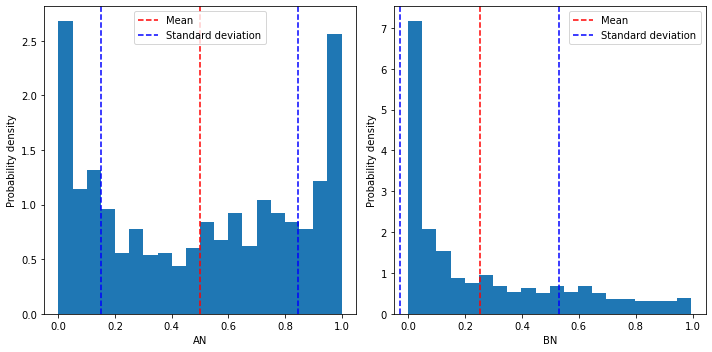

Mean of AN  0.498551
STD of AN  0.34785918041500646
Mean of BN  0.25101399999999996
STD of BN  0.28035687222538347


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of steps and the number of walks
N = 1000
num_walks = 1000

# Initialize arrays to store the fractions of time spent in the right half plane and the first quadrant
AN = np.zeros(num_walks)
BN = np.zeros(num_walks)

# Simulate the random walks
for i in range(num_walks):
    # Initialize the walker's position at the origin
    x, y = 0, 0
    # Initialize the fraction of time spent in the right half plane and the first quadrant to zero
    a_count, b_count = 0, 0
    # Simulate the random walk
    for j in range(N):
        # Choose a random angle between 0 and 2*pi
        angle = np.random.uniform(0, 2*np.pi)
        # Calculate the x and y components of the step with length a=1
        dx, dy = np.cos(angle), np.sin(angle)
        # Move the walker to the new position
        x += dx
        y += dy
        # Check if the walker is in the right half plane (x>0) or the first quadrant (x>0, y>0)
        if x > 0:
            a_count += 1
            if y > 0:
                b_count += 1
    # Calculate the fractions of time spent in the right half plane and the first quadrant
    AN[i] = a_count / N
    BN[i] = b_count / N

# Calculate the mean and standard deviation of AN and BN
mean_AN = np.mean(AN)
std_AN = np.std(AN)
mean_BN = np.mean(BN)
std_BN = np.std(BN)

# Plot the histograms of AN and BN
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(AN, bins=20, density=True)
plt.axvline(x=mean_AN, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_AN-std_AN, color='b', linestyle='--', label='Standard deviation')
plt.axvline(x=mean_AN+std_AN, color='b', linestyle='--')
plt.xlabel('AN')
plt.ylabel('Probability density')
plt.legend()
plt.subplot(122)
plt.hist(BN, bins=20, density=True)
plt.axvline(x=mean_BN, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_BN-std_BN, color='b', linestyle='--', label='Standard deviation')
plt.axvline(x=mean_BN+std_BN, color='b', linestyle='--')
plt.xlabel('BN')
plt.ylabel('Probability density')
plt.legend()
plt.tight_layout()
plt.show()
print("Mean of AN ",mean_AN )
print("STD of AN ",std_AN )
print("Mean of BN ",mean_BN)
print("STD of BN ",std_BN )

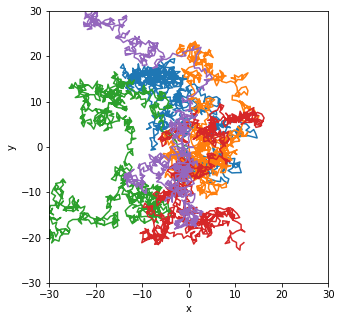

In [6]:
# Plot several trajectories of the random walk
plt.figure(figsize=(5, 5))
for i in range(5):
    x, y = np.zeros(N+1), np.zeros(N+1)
    for j in range(N):
        angle = np.random.uniform(0, 2*np.pi)
        dx, dy = np.cos(angle), np.sin(angle)
        x[j+1] = x[j] + dx
        y[j+1] = y[j] + dy
    plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()
